In [3]:
import pandas as pd
import json
from datetime import datetime

In [4]:
data = {
    'ФИО': [
        'Иванов Иван ИвановичЪ',
        'Сорокина Екатерина Матвеевна',
        'Струков Иван Сергеевич',
        'Корнеева Анна Игоревна',
        'Старчиков Сергей Анатольевич',
        'Бутенко Артем Андреевич',
        'Савченко Алина Сергеевна'
    ],
    'Должность': [
        'Менеджер',
        'Аналитик',
        'Старший программист',
        'Ведущий программист',
        'Младший программист',
        'Архитектор',
        'Старший аналитик'
    ],
    'Дата найма': [
        '22.10.2013',
        '12.03.2020',
        '23.04.2012',
        '22.02.2015',
        '12.11.2021',
        '12.02.2010',
        '13.04.2016'
    ],
    'Оклад': [
        250000,
        75000,
        150000,
        120000,
        50000,
        200000,
        100000
    ]
}

# Создание DataFrame
df = pd.DataFrame(data)

file_path = r"C:\Users\Acer\Desktop\Уник\3 курс\Машинное обучение\Итоговое задание Питон\final_task_data.csv" 
# Сохранение файла в путь   
df.to_csv(file_path, index=False, encoding='utf-8-sig') 
print(f"Файл успешно сохранён по адресу: {file_path}")

Файл успешно сохранён по адресу: C:\Users\Acer\Desktop\Уник\3 курс\Машинное обучение\Итоговое задание Питон\final_task_data.csv


In [5]:
# Фунция 1: премия прогерам
def calculate_prog_bonus(df):

    programmer_filter = df["Должность"].str.contains('программист', case = False) # Находим слово программмист в должностях
    df['Премия'] = 0 # Создаем пустую колонку премия, в которую будут вноситься результаты
    df.loc[programmer_filter, 'Премия'] = df['Оклад'] * 0.03 # Считаем премию
    return df
# Применяем функцию
df_bonus_pr = calculate_prog_bonus(df)
print(df_bonus_pr) # Выводим результат функции

                            ФИО            Должность  Дата найма   Оклад  \
0          Иванов Иван Иванович             Менеджер  22.10.2013  250000   
1  Сорокина Екатерина Матвеевна             Аналитик  12.03.2020   75000   
2        Струков Иван Сергеевич  Старший программист  23.04.2012  150000   
3        Корнеева Анна Игоревна  Ведущий программист  22.02.2015  120000   
4  Старчиков Сергей Анатольевич  Младший программист  12.11.2021   50000   
5       Бутенко Артем Андреевич           Архитектор  12.02.2010  200000   
6      Савченко Алина Сергеевна     Старший аналитик  13.04.2016  100000   

   Премия  
0       0  
1       0  
2    4500  
3    3600  
4    1500  
5       0  
6       0  


In [6]:
#Фунция 2: премия к 8 марта и 23 фев
def holiday_bonus(df):

    df['Премия'] = 0
# Отдельно фильтруем сотрудников женского пола (по окончанию а) и назначаем им премию к 8 марта
    women_filter = df['ФИО'].str.endswith('а')
    df.loc[women_filter, 'Премия'] = 2000 

    df.loc[~women_filter, 'Премия'] = 2000 # Остальным назначаем премию к 23 февраля, т.е. мужчинам

    df_8m = df[women_filter]
    df_23f = df[~women_filter]

    print("Премия к 8 марта:")
    print(df_8m, "\n")

    print("Премия к 23 февраля:")
    print(df_23f, "\n")

    return df_8m, df_23f

df_8m, df_23f = holiday_bonus(df)


Премия к 8 марта:
                            ФИО            Должность  Дата найма   Оклад  \
1  Сорокина Екатерина Матвеевна             Аналитик  12.03.2020   75000   
3        Корнеева Анна Игоревна  Ведущий программист  22.02.2015  120000   
6      Савченко Алина Сергеевна     Старший аналитик  13.04.2016  100000   

   Премия  
1    2000  
3    2000  
6    2000   

Премия к 23 февраля:
                            ФИО            Должность  Дата найма   Оклад  \
0          Иванов Иван Иванович             Менеджер  22.10.2013  250000   
2        Струков Иван Сергеевич  Старший программист  23.04.2012  150000   
4  Старчиков Сергей Анатольевич  Младший программист  12.11.2021   50000   
5       Бутенко Артем Андреевич           Архитектор  12.02.2010  200000   

   Премия  
0    2000  
2    2000  
4    2000  
5    2000   



In [7]:
# Функция 3: индексация зп 
from datetime import datetime

def salary_index(df):

    current_year = datetime.now().year # Определяем текущий год
    df['Стаж'] = current_year - pd.to_datetime(df['Дата найма'], format='%d.%m.%Y').dt.year # Срздаем колонку стаж и вычисляем его 
    df['Индексация'] = 0 # Создаем колонку для заполнения значений индексации
# Если стаж > 10 лет, то идексируем на 7%
    long_term_filter = df['Стаж'] > 10
    df.loc[long_term_filter, 'Индексация'] = df['Оклад'] * 0.07
# Остальным идексируем на 5%
    df.loc[~long_term_filter, 'Индексация'] = df['Оклад'] * 0.05

    return df

df_index = salary_index(df)
print(df_index)

                            ФИО            Должность  Дата найма   Оклад  \
0          Иванов Иван Иванович             Менеджер  22.10.2013  250000   
1  Сорокина Екатерина Матвеевна             Аналитик  12.03.2020   75000   
2        Струков Иван Сергеевич  Старший программист  23.04.2012  150000   
3        Корнеева Анна Игоревна  Ведущий программист  22.02.2015  120000   
4  Старчиков Сергей Анатольевич  Младший программист  12.11.2021   50000   
5       Бутенко Артем Андреевич           Архитектор  12.02.2010  200000   
6      Савченко Алина Сергеевна     Старший аналитик  13.04.2016  100000   

   Премия  Стаж  Индексация  
0    2000    11     17500.0  
1    2000     4      3750.0  
2    2000    12     10500.0  
3    2000     9      6000.0  
4    2000     3      2500.0  
5    2000    14     14000.0  
6    2000     8      5000.0  


C:\Users\Acer\AppData\Local\Temp\ipykernel_35608\570789064.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[17500. 10500. 14000.]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[long_term_filter, 'Индексация'] = df['Оклад'] * 0.07


In [17]:
# Функция 4: график отпусков
def vacation_schedule(df):

    df['Дата найма'] = pd.to_datetime(df['Дата найма'], format='%d.%m.%Y') # Преобразуем столбец Дата найма в формат datatime для работы со значениями
    df['Месяцев в компании'] = (pd.Timestamp.now() - df['Дата найма']).dt.days // 30 # Вычисляем разницу м/у текущей датой и и датой найма в месяцах
    old_enough = df.loc[df['Месяцев в компании'] > 6, 'ФИО'].tolist() # Отфильтровываем сотрудников, проработавших > 6 месяце

    return old_enough

vacation_roll = vacation_schedule(df)
print("Сотрудники, пропработавшие больше 6 месяцев, которые могутвзять отпуск:")
print(vacation_roll)

Сотрудники, пропработавшие больше 6 месяцев, которые могутвзять отпуск:
['Иванов Иван Иванович', 'Сорокина Екатерина Матвеевна', 'Струков Иван Сергеевич', 'Корнеева Анна Игоревна', 'Старчиков Сергей Анатольевич', 'Бутенко Артем Андреевич', 'Савченко Алина Сергеевна']


In [16]:
# Функции для записи в CSV и JSON 
def save_to_csv(df, filename): 
    df.to_csv(filename, index=False, encoding='utf-8-sig') 
    print(f"Данные сохранены в {filename}") 
    
def save_to_json(df, filename): 
    df.to_json(filename, orient='records', force_ascii=False, indent=4) 
    print(f"Данные сохранены в {filename}") 

save_to_csv(df_bonus_pr, "programmer_bonus.csv")
save_to_json(df_bonus_pr, "programmer_bonus.json")

save_to_csv(df_8m, "women_bonus.csv")
save_to_json(df_8m, "women_bonus.json")

save_to_csv(df_23f, "men_bonus.csv")
save_to_json(df_23f, "men_bonus.json")

save_to_csv(df_index, "index_bonus.csv")
save_to_json(df_index, "index_bonus.json")


Данные сохранены в programmer_bonus.csv
Данные сохранены в programmer_bonus.json
Данные сохранены в women_bonus.csv
Данные сохранены в women_bonus.json
Данные сохранены в men_bonus.csv
Данные сохранены в men_bonus.json
Данные сохранены в index_bonus.csv
Данные сохранены в index_bonus.json


In [87]:
# Попытки выполнения доп задания)
# №1

import os
import matplotlib.pyplot as plt

from datetime import datetime
import pandas as pd

class Employee: # Создаем класс про 1 сотрудника с приватными атрибутами
    def __init__(self, фамилия, имя, отчество, должность, дата_найма, оклад):
        # Инкапсулируем свойства 
        self.фамилия = фамилия
        self.имя = имя
        self.отчество = отчество
        self.должность = должность
        self.дата_найма = datetime.strptime(дата_найма, '%d.%m.%Y')
        self.оклад = оклад

    # Геттеры
    def get_фамилия(self):
        return self.фамилия

    def get_имя(self):
        return self.имя

    def get_отчество(self):
        return self.отчество

    def get_должность(self):
        return self.должность

    def get_дата_найма(self):
        return self.дата_найма

    def get_оклад(self):
        return self.оклад

    # Сеттеры
    def set_оклад(self, новый_оклад):
        self.оклад = новый_оклад

    # Метод 1: Премия прогерам
    def calculate_prog_bonus(self):
        if 'программист' in self.должность.lower():
            return self.оклад * 0.03
        return 0

    # Метод 2: Премия к 8 марта и 23 февраля
    def holiday_bonus(self):
        if self.имя.endswith('а'):
            return 2000  # 8 марта
        return 2000  # 23 февраля

    # Метод 3: Индексация зп
    def salary_index(self):
        current_year = datetime.now().year
        years_worked = current_year - self.дата_найма.year
        if years_worked > 10:
            return self.оклад * 0.07
        return self.оклад * 0.05

    # Метод 4: График отпусков
    def vacation_schedule(self):
        months_worked = (datetime.now().year - self.дата_найма.year) * 12 + \
                        (datetime.now().month - self.дата_найма.month)
        return months_worked > 6

    # Метод: Представление сотрудника в виде словаря для хранения
    def to_dict(self):
        return {
            "ФИО": f"{self.фамилия} {self.имя} {self.отчество}",
            "Должность": self.должность,
            "Дата найма": self.дата_найма.strftime('%d.%m.%Y'),
            "Оклад": self.оклад,
            "Премия": self.calculate_prog_bonus(),
            "Праздничная премия": self.holiday_bonus(),
            "Индексация": self.salary_index(),
            "Право на отпуск": self.vacation_schedule()
        }

# Класс для управления списком сотрудниклв
class EmployeeManager:
    def __init__(self, employees):
        self.employees = employees

    def save_to_csv(self, filename):
        df = pd.DataFrame([employee.to_dict() for employee in self.employees])
        df.to_csv(filename, index=False, encoding='utf-8-sig')
        print(f"Данные сохранены в {filename}")

    def save_to_json(self, filename):
        df = pd.DataFrame([employee.to_dict() for employee in self.employees])
        df.to_json(filename, orient='records', force_ascii=False, indent=4)
        print(f"Данные сохранены в {filename}")

# Создаем список сотрудников
employees = [
    Employee("Иванов", "Иван", "Иванович", "Менеджер", "22.10.2013", 250000),
    Employee("Сорокина", "Екатерина", "Матвеевна", "Аналитик", "12.03.2020", 75000),
    Employee("Струков", "Иван", "Сергеевич", "Старший программист", "23.04.2012", 150000),
    Employee("Корнеева", "Анна", "Игоревна", "Ведущий программист", "22.02.2015", 120000),
    Employee("Старчиков", "Сергей", "Анатольевич", "Младший программист", "12.11.2021", 50000),
    Employee("Бутенко", "Артем", "Андреевич", "Архитектор", "12.02.2010", 200000),
    Employee("Савченко", "Алина", "Сергеевна", "Старший аналитик", "13.04.2016", 100000)
]

# Создаем менеджер сотрудников и сохраняем данные
manager = EmployeeManager(employees)
manager.save_to_csv("employees.csv")
manager.save_to_json("employees.json")


Данные сохранены в employees.csv
Данные сохранены в employees.json


In [88]:
# Функция фонда оплаты труда
class EmployeeManager: 
    def __init__(self, employees): 
        self.employees = employees

    def calculate_fot(self): # Рассчитываем фонд оплаты труда
        payment = 0
        for employee in self.employees:
            # Оклад + премия (прогеров) + праздничная премия + индексация
            fee = (
                employee.get_оклад() +
                employee.calculate_prog_bonus() +
                employee.salary_index() +
                employee.holiday_bonus()
            )
            payment += fee
        print(f"Фонд оплаты труда: {fee} рублей")
        
manager = EmployeeManager(employees)       
manager.calculate_fot()


Фонд оплаты труда: 107000.0 рублей


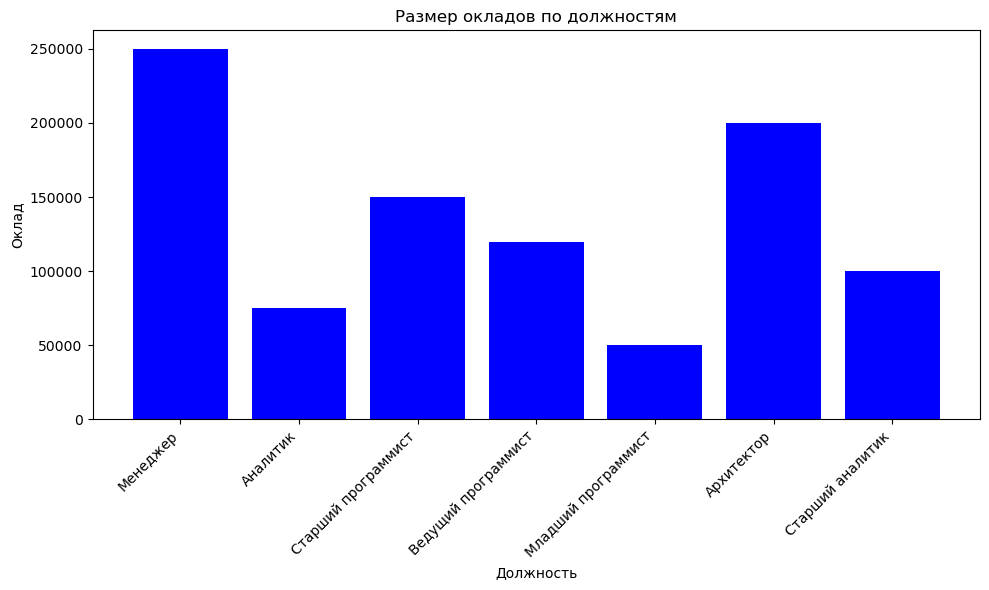

In [90]:
# Функция столбчатых диаграмм с окладами по должностям

def plot_salaries(employees):
    # Получаем должности и оклады
    positions = [employee.get_должность() for employee in employees]
    salaries = [employee.get_оклад() for employee in employees]

    # Создаем столбчатую диаграмму
    plt.figure(figsize=(10, 6))
    plt.bar(positions, salaries, color='blue')

    # Добавляем подписи и заголовок
    plt.xlabel('Должность')
    plt.ylabel('Оклад')
    plt.title('Размер окладов по должностям')
    plt.xticks(rotation=45, ha="right")  # Поворот подписей по оси X
    plt.tight_layout()

    # Отображаем график
    plt.show()

plot_salaries(employees)

In [89]:
# Функция, рассчитывающая налоговые отчисления (подоходный налог, фонд социального страхования)
class EmployeeManager: 
    def __init__(self, employees): 
        self.employees = employees

    def calculate_taxes(self):
        tax_data = []

        for employee in self.employees:
            salary = employee.get_оклад()

            # Подоходный налог (НДФЛ) 13%
            income_tax = salary * 0.13

            # Отчисления в Фонд социального страхования (ФСС) 2.9%
            social_security_tax = salary * 0.029

            # Суммируем все отчисления
            total_taxes = income_tax + social_security_tax

            # Добавляем данные по каждому сотруднику в список
            tax_data.append({
                "ФИО": f"{employee.get_фамилия()} {employee.get_имя()} {employee.get_отчество()}",
                "Оклад": salary,
                "Подоходный налог (13%)": income_tax,
                "ФСС (2.9%)": social_security_tax,
                "Общие налоговые отчисления": total_taxes
            })

            # Преобразуем данные в DataFrame для удобного отображения
        df = pd.DataFrame(tax_data)
        print(df)
        
manager = EmployeeManager(employees) 
manager.calculate_taxes()

                            ФИО   Оклад  Подоходный налог (13%)  ФСС (2.9%)  \
0          Иванов Иван Иванович  250000                 32500.0      7250.0   
1  Сорокина Екатерина Матвеевна   75000                  9750.0      2175.0   
2        Струков Иван Сергеевич  150000                 19500.0      4350.0   
3        Корнеева Анна Игоревна  120000                 15600.0      3480.0   
4  Старчиков Сергей Анатольевич   50000                  6500.0      1450.0   
5       Бутенко Артем Андреевич  200000                 26000.0      5800.0   
6      Савченко Алина Сергеевна  100000                 13000.0      2900.0   

   Общие налоговые отчисления  
0                     39750.0  
1                     11925.0  
2                     23850.0  
3                     19080.0  
4                      7950.0  
5                     31800.0  
6                     15900.0  
